<a href="https://colab.research.google.com/github/jgesc-05/clase-inteligencia-artificial/blob/main/Fundamento_Cuaderno_18_Modelo_Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">Cuaderno 18. Modelo Jerárquico de Clustering <font>

## **Introducción al Modelo Jerárquico**

El clustering jerárquico es una técnica de aprendizaje no supervisado que organiza los datos en una estructura jerárquica de clusters. Este modelo es particularmente útil para explorar cómo los datos se agrupan a diferentes niveles de similitud, proporcionando una representación visual en forma de dendrograma.

Es una alternativa flexible a métodos como K-means o K-medoids, ya que no depende de valores iniciales específicos y produce un dendrograma, una representación gráfica que muestra cómo los datos se agrupan en diferentes niveles de similitud.

Existen dos enfoques principales para el clustering jerárquico:

**Aglomerativo:** (agglomerative clustering o bottom-up):

Comienza tratando cada dato como un cluster individual y los va fusionando sucesivamente.

El proceso continúa hasta que todos los datos forman un único cluster, lo que genera una estructura jerárquica desde abajo hacia arriba.

**Divisivo:** (divisive clustering o top-down):

Inicia agrupando todos los datos en un solo cluster.

Posteriormente, divide recursivamente este cluster en subgrupos más pequeños hasta que cada dato pertenece a su propio cluster.

Ambos métodos generan un dendrograma que representa las uniones o divisiones de los clusters de forma visual. Este árbol jerárquico permite entender la estructura interna de los datos y decidir cómo agruparlos en diferentes niveles.

En la siguiente imagen se aprecia como se contruye el dendograma donde se aprecian las jerarquicas y los diferentes cluster cada vez que se varia de altura.

![imagen](https://github.com/adiacla/bigdata/blob/master/jerarquico.png?raw=true)

##Ventajas y Desventajas

**Ventajas:**

- No requiere especificar el número de clusters inicialmente.
- Produce un dendrograma, que es una representación visual clara de las relaciones entre los datos.
- Adecuado para conjuntos de datos pequeños o medianos.

**Desventajas:**

- Escalabilidad limitada; puede ser computacionalmente costoso para conjuntos de datos grandes.
- Sensible a las métricas de distancia y al método de enlace utilizado.
- Los resultados no son fácilmente ajustables una vez calculados.


## Formulación Matemática

El clustering jerárquico se basa en la distancia entre puntos o clusters y en la elección de un criterio de enlace (linkage), como vimos en los modelos supervisados especificamente en Knn y no supervisados Kmedias, la distancias se calculan con las mismas funciones matemáticas


Distancia entre puntos: Se utiliza una métrica como:

#### Euclidiana:
$$d(x_i, x_j) = \sqrt{\sum_{k=1}^m (x_{ik} - x_{jk})^2}$$

#### Manhattan:
$$d(x_i, x_j) = \sum_{k=1}^m |x_{ik} - x_{jk}|$$


##Proceso del Clustering Jerárquico
Aglomerativo:

- Se comienza con 𝑛 clusters, uno para cada observación.
- Se calcula la distancia entre todos los clusters utilizando una métrica y un método de enlace.
- Se fusionan los dos clusters más similares.
- El proceso se repite hasta que quede un único cluster.

Divisivo:

- Se empieza con todos los puntos en un solo cluster.
- El cluster se divide recursivamente en dos subclusters basados en la mayor disimilitud.
- El proceso continúa hasta que cada punto forma su propio cluster.


Para realizar el proceso de agrupamiento según el modelo anterior, es fundamental establecer cómo medir la similitud entre dos clusters. Esto implica generalizar el concepto de distancia, que normalmente se aplica entre pares de observaciones, para que sea válido entre grupos formados por múltiples observaciones. Este procedimiento se conoce como linkage.

**Tipos de Linkage (Criterio de Enlace):**


**Single Linkage (Mínima)**: Utiliza la distancia más corta entre puntos de dos clusters.
$$
d(C_1, C_2) = \min \{ d(x_i, x_j) : x_i \in C_1, x_j \in C_2 \}
$$

**Complete Linkage (Máxima):** Considera la distancia más larga entre puntos de dos clusters.
$$
d(C_1, C_2) = \max \{ d(x_i, x_j) : x_i \in C_1, x_j \in C_2 \}
$$

**Average Linkage (Promedio)**: Promedia las distancias entre todos los pares de puntos de dos clusters.

$$d(C_1, C_2) = \frac{1}{|C_1| |C_2|} \sum_{x_i \in C_1} \sum{x_j \in C_2} d(x_i, x_j)$$

**Centroid Linkage**: Calcula la distancia entre los centroides de dos clusters.
$$d(C_1, C_2) = d(\bar{x}_1, \bar{x}_2)$$

donde $\bar{x}$ es el centroide del cluster.

**Ward's Minimum Variance**: Minimiza la varianza dentro de los clusters en cada paso de fusión.


##Corte del Dendrograma:


Se corta el dendrograma en un nivel que maximice la separación entre los clusters.

Este nivel puede determinarse utilizando el Coeficiente de Silueta

##Taller Clustering de Clientes con modelo jerarquico

Vamos a realizar el mismo taller de clusterizacion de Kmeans y  Kmedoids usando modelos jerarquicos y vamos verificar la reomendación de numero de clusteres.

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Cargar datos
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Shopping_CustomerData.csv"
data = pd.read_csv(url)


data

,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1
...,...,...,...,...,...,...,...,...
195,1196,Female,54,Delhi,317466.42070,601,52,4
196,1197,Female,20,Bengaluru,323305.50020,554,58,1
197,1198,Male,44,Chennai,109058.54430,844,36,2
198,1199,Male,28,Delhi,160116.89300,837,24,4


##Codificar la variable 'Genero' (Male = 0, Female = 1):

Al igual que los anterior ejercicios, primero, se codifica la variable categórica 'Genero' (Male = 0, Female = 1) para convertirla en una forma numérica. Luego, se selecciona las columnas numéricas relevantes para el análisis (Edad, Ingresos, Credito, Gastos, Trabajo, y Genero) y se eliminna las no necesarias, como ID y Ciudad.

A continuación, normalizamos los datos utilizando el StandardScaler de scikit-learn, asegurando que todas las variables tengan la misma escala (media 0 y desviación estándar 1).
Esto es crucial para que ninguna variable, como Ingresos, domine las distancias calculadas en el algoritmo K-means. El resultado es un conjunto de datos listos para ser procesados y segmentados en grupos utilizando técnicas de clustering.

In [2]:
# Preprocesamiento: Codificar 'Genero' y seleccionar columnas relevantes
data['Genero'] = data['Genero'].map({'Male': 0, 'Female': 1})
data_numeric = data[['Edad', 'Ingresos', 'Credito', 'gastos', 'Genero']]

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

data_scaled

array([[ 0.2165087 ,  1.43599311, -0.64203672,  0.95267867, -1.12815215],
       [ 0.83866013, -0.46207437, -0.86251966,  0.42913296, -1.12815215],
       [ 0.52758441, -0.71514273, -1.58148576,  0.63855125,  0.88640526],
       [-0.2189973 , -1.3561374 , -0.20107085, -0.72266759,  0.88640526],
       [-0.96557902, -0.17149652,  0.70003332, -1.56034072,  0.88640526],
       [-0.46785787,  1.12662717, -0.81458859,  1.61583657,  0.88640526],
       [-0.03235187, -0.58523883,  1.54362021, -1.69995291,  0.88640526],
       [-1.40108502,  0.7647213 ,  1.26561999,  0.91777562,  0.88640526],
       [ 0.83866013, -1.11299881, -0.11479492, -1.00189197, -1.12815215],
       [ 0.15429355, -0.62718718, -0.48865729,  1.61583657,  0.88640526],
       [ 0.58979956, -0.53983614, -0.97755424, -1.31601939, -1.12815215],
       [ 1.70967213, -0.34126711, -1.0158991 ,  0.39422992,  0.88640526],
       [ 0.52758441,  0.58887426, -0.08603628,  0.46403601,  0.88640526],
       [-0.71671845,  0.92451774, -0.8

In [3]:
len(data)

200

## Generar el dendrograma
El siguiente paso es generar un dendrograma para visualizar cómo las observaciones o puntos de datos se agrupan en el proceso de clustering jerárquico. Este gráfico permite identificar las relaciones jerárquicas entre los datos y determinar el número óptimo de clusters realizando un "corte" horizontal en el dendrograma.

**Aspectos considerados en este paso:**

- Escalamiento de los datos:

Antes de aplicar el clustering jerárquico, los datos deben ser escalados para garantizar que todas las características tengan la misma importancia en el cálculo de distancias. Esto se logra a través de técnicas como la estandarización (z-score) o min-max ya vistas en este curso y que aplicaron en el paso anterior.

- Matriz de linkage:

El cálculo de la matriz de linkage es esencial para el clustering jerárquico. En este caso, se utiliza el método de Ward, que minimiza la varianza intracluster a medida que se combinan los clusters. Otros métodos, como single, complete o average linkage, podrían haber sido seleccionados dependiendo del caso de estudio.

- Ejes del dendrograma:

**Eje X:** Representa las muestras o puntos de datos, ordenados de manera que las fusiones entre clusters sean claras.
**Eje Y:** Muestra la distancia o disimilitud entre clusters. Cuanto mayor es la altura de una unión, más diferentes son los clusters fusionados.

## Corte del dendrograma:

El dendrograma proporciona una guía para elegir el número de clusters. Un corte horizontal a una cierta altura divide las ramas en clusters separados. La altura del corte refleja el nivel de similitud aceptado para agrupar observaciones.

##Visualización de las relaciones:

Las fusiones que ocurren a menor altura indican mayor similitud entre los datos combinados.

Fusiones a mayor altura representan una menor similitud y, por lo tanto, clusters más heterogéneos.

Esta visualización es crucial para interpretar cómo se forman los grupos y decidir el número final de clusters para el análisis. Vamos a generarlo con los metodos: wards, complete y average, y compara los dendogramas.

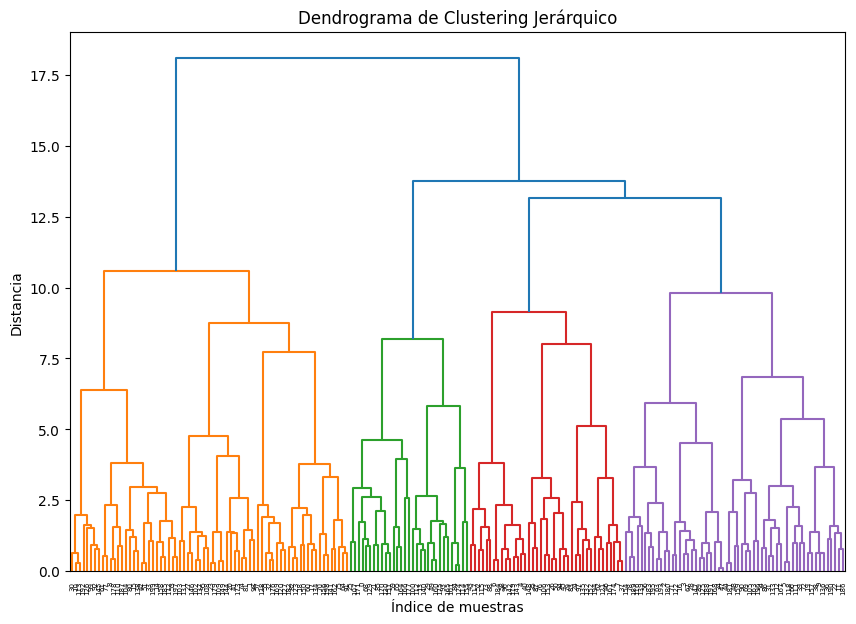

In [4]:
# Generar dendrograma con el método ward
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de muestras")
plt.ylabel("Distancia")
plt.show()

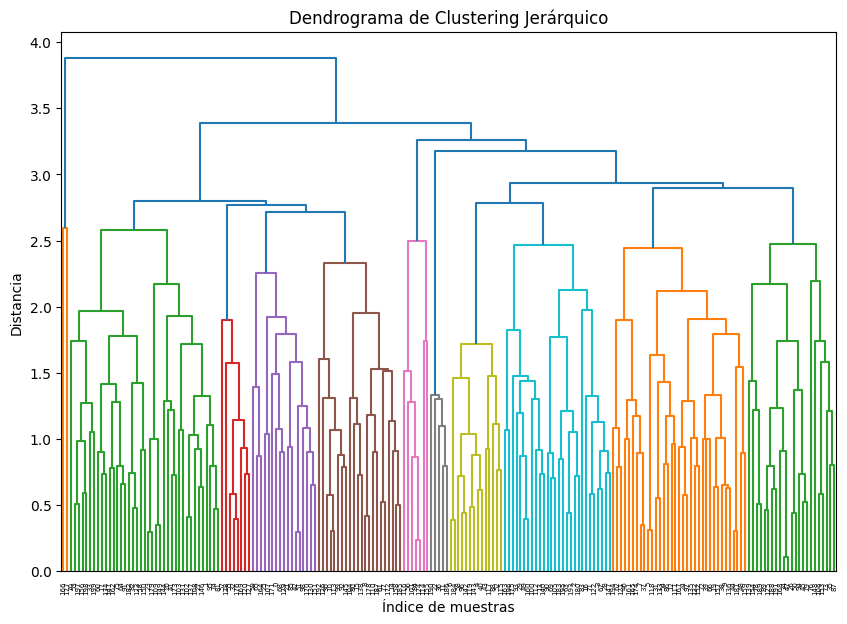

In [5]:
# Generar dendrograma con el método Average
linkage_matrix = linkage(data_scaled, method='average')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de muestras")
plt.ylabel("Distancia")
plt.show()

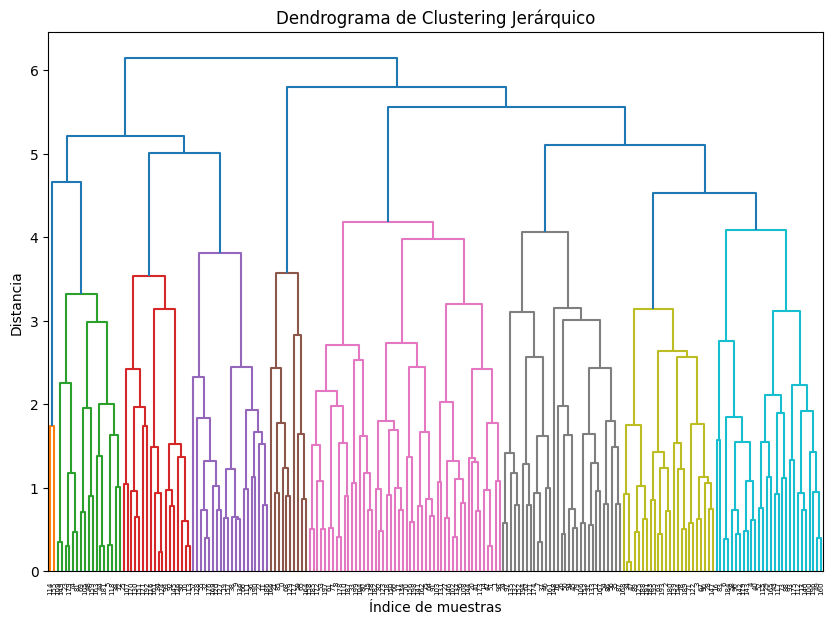

In [6]:
# Generar dendrograma con el método Complete
linkage_matrix = linkage(data_scaled, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de muestras")
plt.ylabel("Distancia")
plt.show()


Cortar el dendograma de "ward" a una altura de 7.5 para verficar cuantos clusteres se crean y en la gráfica aprecia que la linea corta 12 ejes, lo que signfica crear 12 grupos.


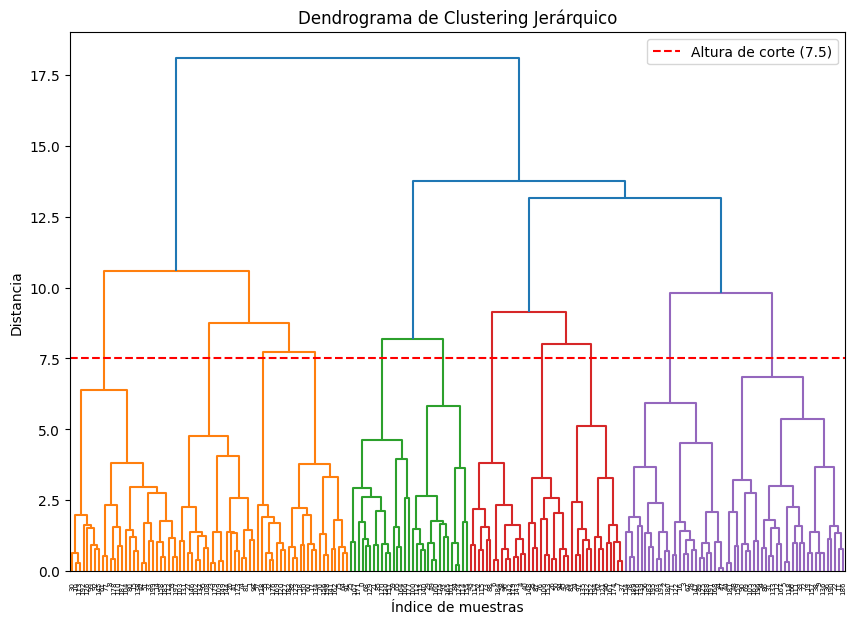

In [7]:
# Generar dendrograma con el método Ward
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)

# Añadir título y etiquetas
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índice de muestras")
plt.ylabel("Distancia")

# Trazar línea horizontal a la altura de 7.5
plt.axhline(y=7.5, color='r', linestyle='--', label='Altura de corte (7.5)')

# Mostrar leyenda y gráfico
plt.legend()
plt.show()


Corte del dendograma a distancia fija 7.5

In [8]:
# --- Versión 1: Cortar por distancia fija ---
clusters_by_distance = fcluster(linkage_matrix, t=7.5, criterion='distance')
print("Grupos creados al cortar por distancia fija (7.5):")
print(pd.Series(clusters_by_distance).value_counts())

Grupos creados al cortar por distancia fija (7.5):
11    31
1     28
10    26
2     20
5     16
4     16
7     15
6     15
9     14
8     11
3      8
Name: count, dtype: int64


Corte del dendograma por número fijo de clusteres

In [9]:
# --- Versión 2: Cortar por número fijo de clusters ---
num_clusters = 12  # Cambiar según el caso deseado
clusters_by_number = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
print(f"Grupos creados para {num_clusters} clusters:")
print(pd.Series(clusters_by_number).value_counts())

Grupos creados para 12 clusters:
1     28
10    26
12    22
2     20
4     16
5     16
7     15
6     15
9     14
8     11
11     9
3      8
Name: count, dtype: int64


In [10]:
#Asignar el cluster a cada cliente
data['Cluster'] = clusters_by_number
data

,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo,Cluster
0,1001,0,49,Bengaluru,527547.58850,653,78,1,5
1,1002,0,59,Bengaluru,207143.19760,630,63,1,2
2,1003,1,54,Delhi,164423.84570,555,69,4,10
3,1004,1,42,Bengaluru,56220.36443,699,30,1,10
4,1005,1,30,Bengaluru,256194.36190,793,6,1,7
...,...,...,...,...,...,...,...,...,...
195,1196,1,54,Delhi,317466.42070,601,52,4,10
196,1197,1,20,Bengaluru,323305.50020,554,58,1,11
197,1198,0,44,Chennai,109058.54430,844,36,2,1
198,1199,0,28,Delhi,160116.89300,837,24,4,4


El siguiente scatter plot, nos muestra que con solo dos coluunas (features) no podemos fácilmente visualizar los cluster separados.

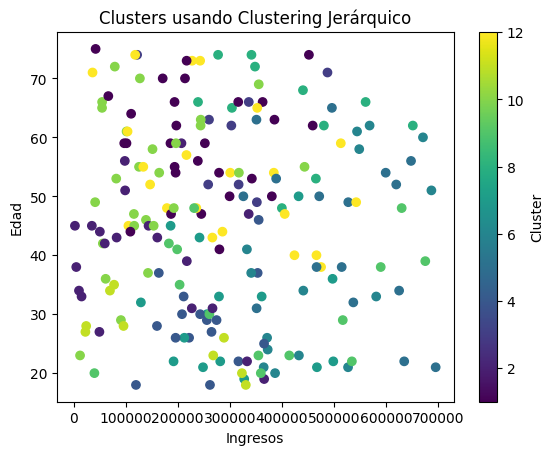

In [11]:

# Visualizar clusters
plt.scatter(data['Ingresos'], data['Edad'], c=data['Cluster'], cmap='viridis')
plt.title("Clusters usando Clustering Jerárquico")
plt.xlabel('Ingresos')
plt.ylabel('Edad')
plt.colorbar(label='Cluster')
plt.show()

In [12]:
# Evaluar con coeficiente de silueta por numero de clusters
silhouette_avg = silhouette_score(data_scaled, clusters_by_number)
print(f"Coeficiente de silueta promedio: {silhouette_avg}")

Coeficiente de silueta promedio: 0.21026804473856472


In [13]:
# Evaluar con coeficiente de silueta por distancia de la altura
silhouette_avg = silhouette_score(data_scaled, clusters_by_distance)
print(f"Coeficiente de silueta promedio: {silhouette_avg}")

Coeficiente de silueta promedio: 0.2019614914272621


#Determinar el número de K usando modelo jerárquico, usando Silluette.


**Cálculo de la matriz de enlace (linkage_matrix):**
El cálculo de la matriz de enlace es esencial en el clustering jerárquico. Utilizamos el método ward, que busca minimizar la varianza dentro de los clusters al realizar las uniones. También podrías probar con otros métodos de enlace como 'single', 'complete', o 'average'.

**Uso de fcluster con criterion='maxclust':**
En lugar de cortar por distancia fija, utilizamos el criterio 'maxclust' que permite especificar el número exacto de clusters (t=k) que deseas obtener. Esto se ajusta en el ciclo for k in range_clusters, donde probamos con diferentes valores de k.

**Cálculo de la puntuación de silueta:**
Usamos silhouette_score para evaluar qué tan bien definidos están los clusters para cada número de clusters k.

**Graficado de la puntuación de silueta:**
Se genera una gráfica para visualizar cómo varía el coeficiente de silueta conforme cambiamos el número de clusters. Esto te permitirá identificar el número óptimo de clusters.

**¿Cómo elegir t para varios clusters?**
Si deseas experimentar con el número exacto de clusters, puedes cambiar el valor de t dentro del ciclo. Usar fcluster(linkage_matrix, t=k, criterion='maxclust') permite dividir el conjunto de datos en exactamente k clusters.

La mejor forma de ajustar t (o el número de clusters) es observar el coeficiente de silueta: un valor más alto indica una mejor separación entre los clusters.


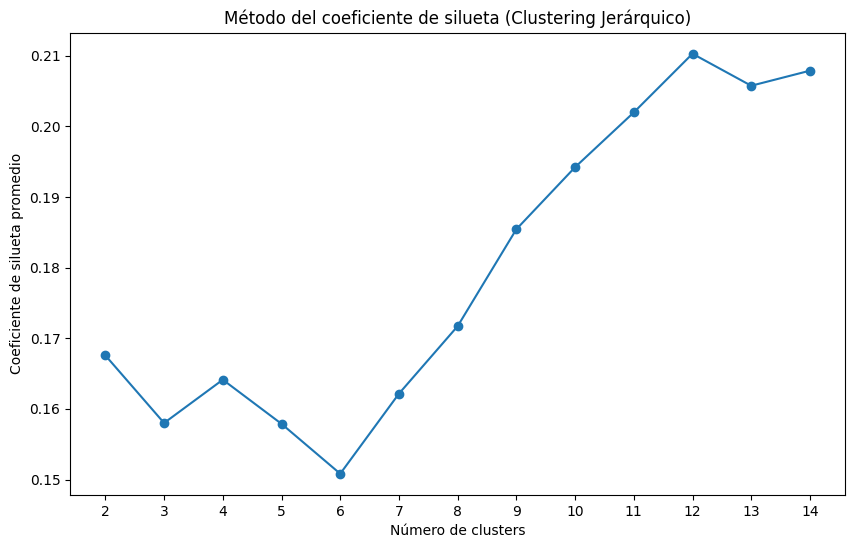

[np.float64(0.16756565332044002),
 np.float64(0.1580000917395301),
 np.float64(0.1641271286230541),
 np.float64(0.15788054591836254),
 np.float64(0.15082160051730598),
 np.float64(0.16215034389348507),
 np.float64(0.17170656366692658),
 np.float64(0.18542566164053464),
 np.float64(0.19420590366245855),
 np.float64(0.2019614914272621),
 np.float64(0.21026804473856472),
 np.float64(0.20573595738547276),
 np.float64(0.2078683105065977)]

In [14]:
# --- Calcular el linkage (matriz de enlace) para el clustering jerárquico ---
# Asegúrate de que tu variable 'data_scaled' contiene los datos escalados (normalizados)
linkage_matrix = linkage(data_scaled, method='ward')  # Puedes usar otros métodos como 'single', 'complete', etc.

# --- Definir el rango de posibles números de clusters ---
range_clusters = range(2, 15)

# Lista para almacenar las puntuaciones de silueta
silhouette_scores = []

# Calcular el coeficiente de silueta para cada número de clusters
for k in range_clusters:
    # Cortar el dendrograma para obtener 'k' clusters
    clusters_by_number = fcluster(linkage_matrix, t=k, criterion='maxclust')

    # Calcular la puntuación de silueta para los clusters obtenidos
    silhouette_avg = silhouette_score(data_scaled, clusters_by_number)
    silhouette_scores.append(silhouette_avg)

# --- Graficar el promedio del coeficiente de silueta ---
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title("Método del coeficiente de silueta (Clustering Jerárquico)")
plt.xlabel("Número de clusters")
plt.ylabel("Coeficiente de silueta promedio")
plt.xticks(range_clusters)
plt.show()

# Mostrar las puntuaciones de silueta
silhouette_scores

In [15]:
#Convertir a numpy array para manejo fácil
scores_array = np.array(silhouette_scores)

# Obtener índices ordenados de mayor a menor
sorted_indices = scores_array.argsort()[::-1]

# Excluir el primero (el mejor) y tomar los siguientes dos
second_and_third_best_indices = sorted_indices[0:5]

# Mostrar los índices y valores correspondientes
for idx in second_and_third_best_indices:
    print(f"Número de grupos: {idx + 2}, Silhouette Score: {silhouette_scores[idx]:.4f}")

Número de grupos: 12, Silhouette Score: 0.2103
Número de grupos: 14, Silhouette Score: 0.2079
Número de grupos: 13, Silhouette Score: 0.2057
Número de grupos: 11, Silhouette Score: 0.2020
Número de grupos: 10, Silhouette Score: 0.1942


from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering().fit(X)
clustering
AgglomerativeClustering()
clustering.labels_
array([1, 1, 1, 0, 0, 0])

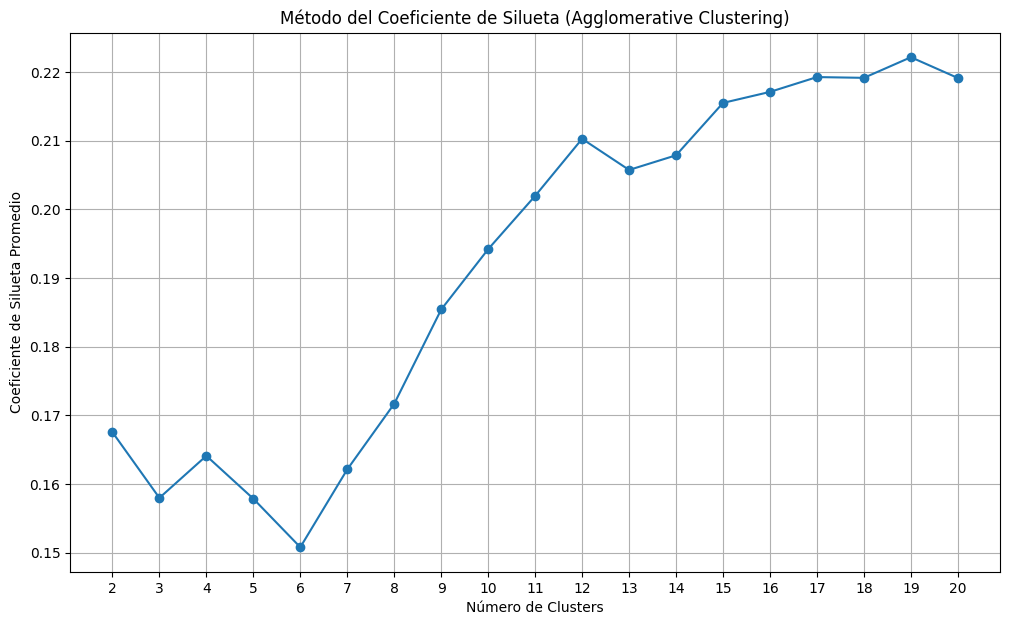

Coeficientes de Silueta para cada número de clusters:
Número de Clusters: 2, Coeficiente de Silueta: 0.1676
Número de Clusters: 3, Coeficiente de Silueta: 0.1580
Número de Clusters: 4, Coeficiente de Silueta: 0.1641
Número de Clusters: 5, Coeficiente de Silueta: 0.1579
Número de Clusters: 6, Coeficiente de Silueta: 0.1508
Número de Clusters: 7, Coeficiente de Silueta: 0.1622
Número de Clusters: 8, Coeficiente de Silueta: 0.1717
Número de Clusters: 9, Coeficiente de Silueta: 0.1854
Número de Clusters: 10, Coeficiente de Silueta: 0.1942
Número de Clusters: 11, Coeficiente de Silueta: 0.2020
Número de Clusters: 12, Coeficiente de Silueta: 0.2103
Número de Clusters: 13, Coeficiente de Silueta: 0.2057
Número de Clusters: 14, Coeficiente de Silueta: 0.2079
Número de Clusters: 15, Coeficiente de Silueta: 0.2155
Número de Clusters: 16, Coeficiente de Silueta: 0.2171
Número de Clusters: 17, Coeficiente de Silueta: 0.2193
Número de Clusters: 18, Coeficiente de Silueta: 0.2191
Número de Clusters:

In [16]:
#  metodo silueta para evaluar de 2 a 20 clusteres usando AgglomerativeClustering(n_clusters=n, metric='euclidean',linkage='ward').fit(data_scaled)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

def evaluar_silueta_jerarquico(data_scaled, min_clusters, max_clusters):
    """
    Evalúa el coeficiente de silueta para diferentes números de clusters
    usando AgglomerativeClustering.

    Args:
        data_scaled (np.ndarray): Datos escalados para el clustering.
        min_clusters (int): Número mínimo de clusters a evaluar.
        max_clusters (int): Número máximo de clusters a evaluar.

    Returns:
        tuple: Una tupla con:
            - range_clusters (list): Lista de números de clusters evaluados.
            - silhouette_scores (list): Lista de los coeficientes de silueta correspondientes.
    """
    range_clusters = range(min_clusters, max_clusters + 1)
    silhouette_scores = []

    for n_clusters in range_clusters:
        # Aplicar AgglomerativeClustering
        clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward').fit(data_scaled)

        # Obtener las etiquetas de los clusters
        labels = clustering.labels_

        # Calcular el coeficiente de silueta
        silhouette_avg = silhouette_score(data_scaled, labels)
        silhouette_scores.append(silhouette_avg)

    return range_clusters, silhouette_scores

# Definir el rango de clusters a evaluar
min_k = 2
max_k = 20

# Evaluar el coeficiente de silueta
range_clusters, silhouette_scores = evaluar_silueta_jerarquico(data_scaled, min_k, max_k)

# Graficar los resultados
plt.figure(figsize=(12, 7))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title("Método del Coeficiente de Silueta (Agglomerative Clustering)")
plt.xlabel("Número de Clusters")
plt.ylabel("Coeficiente de Silueta Promedio")
plt.xticks(range_clusters)
plt.grid(True)
plt.show()

# Mostrar las puntuaciones de silueta
print("Coeficientes de Silueta para cada número de clusters:")
for k, score in zip(range_clusters, silhouette_scores):
    print(f"Número de Clusters: {k}, Coeficiente de Silueta: {score:.4f}")


In [17]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters=12, metric='euclidean',linkage='ward').fit(data_scaled)
clustering

AgglomerativeClustering(n_clusters=12)

In [18]:
clustering.labels_

array([ 8,  7,  2,  2,  6,  3,  6,  5,  0,  3,  0,  3,  3,  1,  0,  0,  2,
        4,  4,  3,  7,  8,  3,  7,  5,  8,  9,  7,  2,  1,  0,  3, 10,  0,
        2,  9,  3,  5,  3,  3,  6,  7,  0,  6, 11,  9,  5,  2, 11,  1,  9,
        0,  6,  0,  3, 10,  2, 10,  6,  8,  4,  0,  5,  2,  4,  8,  3,  2,
        8, 11,  4,  2,  3,  6,  7,  4,  9,  0,  2,  9,  0,  7,  4,  5,  1,
        8,  3,  9,  6,  2, 11,  4,  0,  1,  9,  7,  6,  5,  7,  0,  1,  1,
        7,  7,  0, 11,  9,  8,  7,  7,  0,  3,  1,  0,  1,  6,  2,  6,  3,
        6, 10,  5,  2,  4,  1,  2,  0, 10, 10,  8,  8,  7,  5,  3,  4,  5,
        3,  7,  0,  2,  1,  4,  6,  6,  7,  0,  7,  2,  9,  7,  4,  8,  5,
        9,  2,  1,  4,  3,  0, 11,  1,  5,  4, 11,  8,  1,  8,  3,  2, 10,
        8,  8,  0,  7,  5,  1, 10,  8,  0,  7,  2, 11,  4,  2,  6,  0,  3,
        0,  2,  2,  3,  2,  0,  2,  5,  2, 11,  0,  4,  0])

In [19]:
#asignar el cluster a data

data['Cluster'] = clustering.labels_

In [20]:
data

,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo,Cluster
0,1001,0,49,Bengaluru,527547.58850,653,78,1,8
1,1002,0,59,Bengaluru,207143.19760,630,63,1,7
2,1003,1,54,Delhi,164423.84570,555,69,4,2
3,1004,1,42,Bengaluru,56220.36443,699,30,1,2
4,1005,1,30,Bengaluru,256194.36190,793,6,1,6
...,...,...,...,...,...,...,...,...,...
195,1196,1,54,Delhi,317466.42070,601,52,4,2
196,1197,1,20,Bengaluru,323305.50020,554,58,1,11
197,1198,0,44,Chennai,109058.54430,844,36,2,0
198,1199,0,28,Delhi,160116.89300,837,24,4,4


In [21]:
#persistecia al modelo de AgglomerativeClustering usnado joblib
import joblib
joblib.dump(clustering, 'modelo_jerarquico.job')

# Cargar el scaler que se usó para transformar los datos originales
# Asumimos que el scaler ya está disponible en el entorno (`scaler`)
# Si el scaler no está disponible, deberías guardarlo y cargarlo de la misma forma que el modelo:
joblib.dump(scaler, 'scaler.job')
scaler_cargado = joblib.load('scaler.job')

In [22]:
# clientes nuevos
# ID	Genero	Edad	Ciudad	Ingresos	Credito	gastos	trabajo	Cluster

import pandas as pd
import numpy as np
# Nuevos clientes en formato de lista de diccionarios
nuevos_clientes = [
    {'ID': 9999, 'Genero': 0, 'Edad': 59, 'Ciudad': 'Bengaluru', 'Ingresos': 220000, 'Credito': 630, 'gastos': 60, 'trabajo': 1},
    {'ID': 99999, 'Genero': 1, 'Edad': 20, 'Ciudad': 'Bengaluru', 'Ingresos': 333300, 'Credito': 550, 'gastos': 55, 'trabajo': 1},
    # Puedes añadir más clientes aquí
]

# Convertir la lista de diccionarios a DataFrame
nuevos_clientes_df = pd.DataFrame(nuevos_clientes)
nuevos_clientes_df

,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo
0,9999,0,59,Bengaluru,220000,630,60,1
1,99999,1,20,Bengaluru,333300,550,55,1


In [23]:
# Realizar el preprocesamiento de los nuevos datos
# Seleccionar las mismas columnas numéricas usadas para entrenar el modelo
nuevos_clientes_numeric = nuevos_clientes_df[['Edad', 'Ingresos', 'Credito', 'gastos', 'Genero']]

# Escalar los nuevos datos usando el *mismo* scaler que se usó para entrenar
# Es crucial usar el scaler original para mantener la coherencia
nuevos_clientes_scaled = scaler.transform(nuevos_clientes_numeric)

# Cargar el modelo entrenado
modelo_jerarquico_cargado = joblib.load('modelo_jerarquico.job')

# Asignar el cluster a los nuevos clientes usando el modelo cargado
# La función predict no está disponible en AgglomerativeClustering de esta forma.
# Debemos usar el método fit_predict en los nuevos datos escalados
# O si queremos simplemente predecir con un modelo ya entrenado,
# podemos usar fit_predict en los nuevos datos.
# Sin embargo, esto recalcularía los clusters basado solo en los nuevos puntos.
# Un enfoque más apropiado para asignar clusters con un modelo jerárquico entrenado
# a nuevos datos es un poco más complejo que con modelos centroidales (como K-Means).

# AgglomerativeClustering no tiene un método 'predict' directo para nuevos datos.
# Una forma común de abordar esto es encontrar el cluster del modelo entrenado
# al que cada nuevo punto está más cerca.

# Para simplificar y dado que el modelo jerárquico agrupa los datos originales,
# una forma de "predecir" para nuevos puntos es encontrar la distancia mínima
# de cada nuevo punto a los puntos originales dentro de cada cluster
# y asignarlo al cluster cuyo promedio de distancias sea mínimo, o al cluster
# cuyo centroide (si lo calculamos) esté más cerca.

# Alternativa simple (no es una predicción perfecta para jerárquico, pero asigna al cluster más cercano)
# Podemos calcular la distancia de cada nuevo punto a los centroides de los clusters originales.
# Primero, calculamos los centroides de los clusters del modelo original.
# Asegúrate de tener los datos originales escalados ('data_scaled') y las etiquetas de cluster ('clustering.labels_')

# Calcular los centroides de los clusters originales
original_data_with_clusters = pd.DataFrame(data_scaled, columns=nuevos_clientes_numeric.columns)
original_data_with_clusters['Cluster'] = clustering.labels_

cluster_centroids = original_data_with_clusters.groupby('Cluster').mean().values

In [24]:
# Asignar cada nuevo cliente al cluster con el centroide más cercano
def assign_cluster_to_new_point(new_point, centroids):
    distances = np.linalg.norm(centroids - new_point, axis=1)
    return np.argmin(distances)

nuevos_clientes_df['Cluster Asignado'] = [
    assign_cluster_to_new_point(point, cluster_centroids)
    for point in nuevos_clientes_scaled
]


In [25]:
# Mostrar los nuevos clientes con sus clusters asignados
print("\nNuevos clientes con clusters asignados:")
nuevos_clientes_df


Nuevos clientes con clusters asignados:


,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo,Cluster Asignado
0,9999,0,59,Bengaluru,220000,630,60,1,7
1,99999,1,20,Bengaluru,333300,550,55,1,11


In [26]:
# todos los centroides de los clusteres creados pero con el data

import pandas as pd
# Mostrar los centroides de los clusters
print("\nCentroides de los clusters:")
print(pd.DataFrame(cluster_centroids, columns=nuevos_clientes_numeric.columns))

# O si quieres ver los centroides junto con los datos originales para cada cluster
print("\nDatos esclados con etiquetas de cluster y sus centroides:")
original_data_with_clusters



Centroides de los clusters:
        Edad  Ingresos   Credito    gastos    Genero
0   0.867546 -0.297402  0.310080 -0.862280 -1.128152
1  -0.459563  1.143476 -0.824175 -0.392252  0.886405
2   0.429476 -0.808470 -0.359981 -0.585740  0.886405
3   0.533240 -0.029217 -0.405867  1.174789  0.886405
4  -1.039460 -0.218282  0.740775  0.125913 -1.128152
5  -0.796709  0.508418  1.091014  1.047416  0.886405
6  -0.944841  0.132358  1.050250 -1.222945  0.886405
7  -0.362092 -0.869650 -0.980430  0.247637 -1.128152
8  -0.079013  1.367162 -0.663007 -0.138042 -1.128152
9   1.183671  0.739440  1.100911 -0.065856  0.886405
10  0.970867  0.115053  0.646111  1.323524 -1.128152
11 -1.179876 -0.700941 -0.885953  0.941044  0.886405

Datos esclados con etiquetas de cluster y sus centroides:


,Edad,Ingresos,Credito,gastos,Genero,Cluster
0,0.216509,1.435993,-0.642037,0.952679,-1.128152,8
1,0.838660,-0.462074,-0.862520,0.429133,-1.128152,7
2,0.527584,-0.715143,-1.581486,0.638551,0.886405,2
3,-0.218997,-1.356137,-0.201071,-0.722668,0.886405,2
4,-0.965579,-0.171497,0.700033,-1.560341,0.886405,6
...,...,...,...,...,...,...
195,0.527584,0.191478,-1.140520,0.045199,0.886405,2
196,-1.587730,0.226068,-1.591072,0.254618,0.886405,11
197,-0.094567,-1.043125,1.188930,-0.513249,-1.128152,0
198,-1.090009,-0.740657,1.121827,-0.932086,-1.128152,4


In [27]:

import pandas as pd
# Para obtener los centroides de los clusters en la escala original,
# necesitamos aplicar la inversa de la transformación de escalado
# a los centroides calculados en los datos escalados.

# Centroides calculados en datos escalados:
# cluster_centroids # <- Ya calculamos esto anteriormente


# Aplicar la transformación inversa a los centroides escalados
# La función inverse_transform espera un array 2D
cluster_centroids_original_scale = scaler.inverse_transform(cluster_centroids)

# Mostrar los centroides en la escala original
print("\nCentroides de los clusters en la escala original:")
print(pd.DataFrame(cluster_centroids_original_scale, columns=nuevos_clientes_numeric.columns))


Centroides de los clusters en la escala original:
         Edad       Ingresos     Credito     gastos  Genero
0   59.464286  234940.890603  752.321429  26.000000     0.0
1   38.133333  478168.997580  634.000000  39.466667     1.0
2   52.423077  148669.743095  682.423077  33.923077     1.0
3   54.090909  280211.945831  677.636364  84.363636     1.0
4   28.812500  248296.681319  797.250000  54.312500     0.0
5   32.714286  370967.740831  833.785714  80.714286     1.0
6   30.333333  307486.742093  829.533333  15.666667     1.0
7   39.700000  138342.079392  617.700000  57.800000     0.0
8   44.250000  515928.501838  650.812500  46.750000     0.0
9   64.545455  409965.602409  834.818182  48.818182     1.0
10  61.125000  304565.600650  787.375000  88.625000     0.0
11  26.555556  166821.094100  627.555556  77.666667     1.0
